In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza (IT1,122_54_DF_DCSC_TUR_10,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,OBS_VALUE
TIME_PERIOD,
2018,128.100932
2019,131.381653
2020,55.702138
2021,78.670967
2022,118.514633


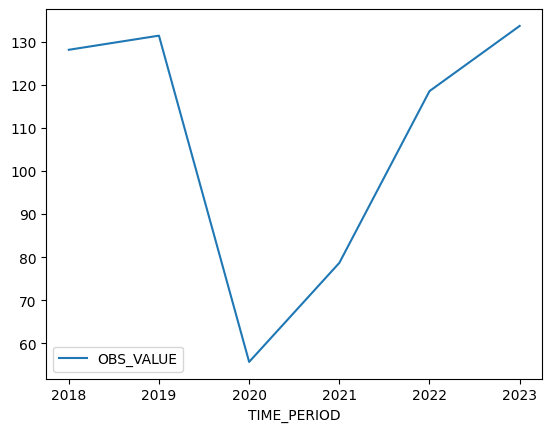

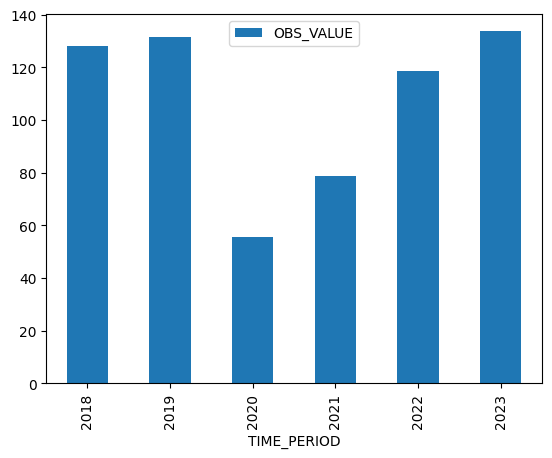

In [3]:
arrivals_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals.plot()
arrivals.plot.bar()
arrivals.head()

(0.0, 140.31854445)

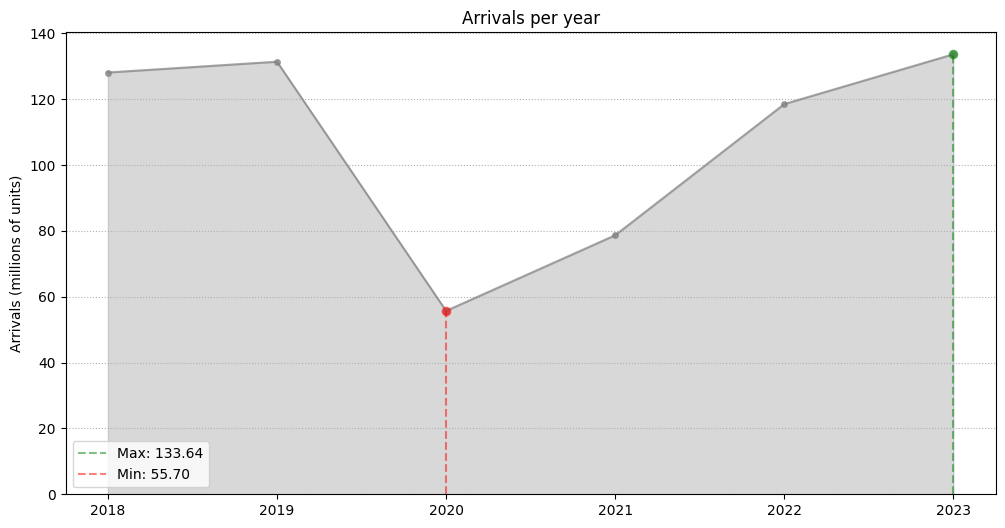

In [4]:
min_v = arrivals[arrivals['OBS_VALUE'] == min(arrivals['OBS_VALUE'])]
max_v = arrivals[arrivals['OBS_VALUE'] == max(arrivals['OBS_VALUE'])]

plt.figure(figsize=(12, 6))

plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', markersize=4, color="gray", alpha=0.7)
plt.fill_between(arrivals.index, arrivals['OBS_VALUE'], 0, color="gray", alpha=0.3)

plt.plot(max_v.index, max_v['OBS_VALUE'], 'o', color="green", alpha=0.5)
plt.vlines(max_v.index, 0, max_v['OBS_VALUE'], linestyles='dashed', color="green", label=f'Max: {max_v["OBS_VALUE"].values[0]:.2f}', alpha=0.5)

plt.plot(min_v.index, min_v['OBS_VALUE'], 'o', color="red", alpha=0.5)
plt.vlines(min_v.index, 0, min_v['OBS_VALUE'], linestyles='dashed', color="red", label=f'Min: {min_v["OBS_VALUE"].values[0]:.2f}', alpha=0.5)

plt.legend()
plt.ylabel("Arrivals (millions of units)")
plt.title("Arrivals per year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

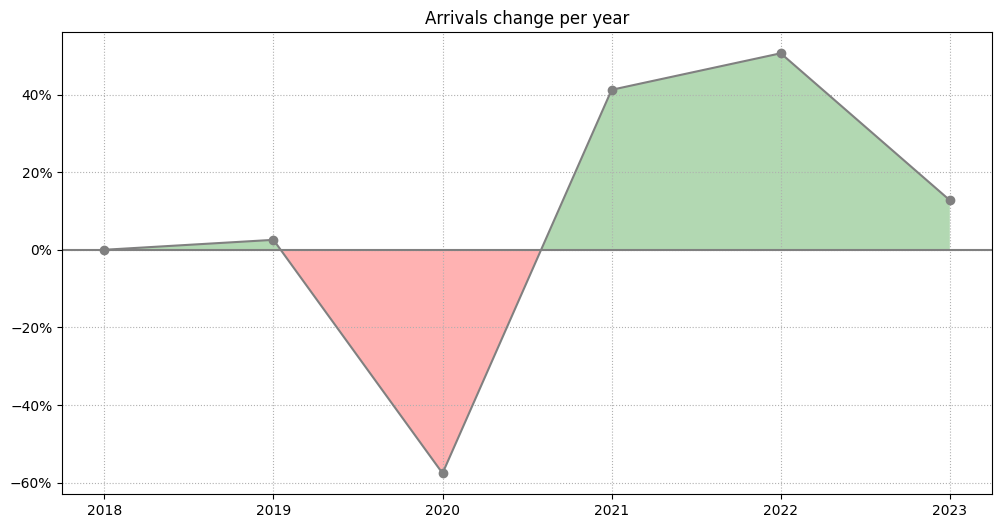

In [5]:
diff = arrivals['OBS_VALUE'].pct_change() * 100
diff = diff.fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(diff.index, diff.values, 'o-', color="gray")
plt.fill_between(diff.index, 0, diff.values, where=diff.values >= 0, facecolor='green', interpolate=True, alpha=0.3)
plt.fill_between(diff.index, 0, diff.values, where=diff.values < 0, facecolor='red', interpolate=True, alpha=0.3)

plt.axhline(0, color='gray', linestyle='-')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.title("Arrivals change per year")
plt.grid(True, linestyle=':')

plt.show()
